* **Goal**: The goal of this project is to analyze customer demographic, professional, and financial data to uncover patterns and insights related to credit risk behavior.This analysis will help financial decision-makers understand key factors influencing customer risk levels, assess lending profiles, and design targeted strategies for customer segmentation, credit approval, and policy optimization.
* **Skill**: EDA

### EDA
* EDA is the process of data understanding on Validated data

* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* EDA will follow two concepts

    * Stats
      * Descriptive
    * Visual Analysis

### TOC <a id='menu'>

* [0. Data](#dc)
* [1. Data Validation and Normalization](#dv)
* [2. EDA](#eda)
    * [2.1 Types of Variables/Columns](#vartype)
    * [2.2 Analysis](#ans)
        * [2.2.1 Uni-Variate Analysis](#uni)
        * [2.2.2 Bi-Variate Analysis](#bi)
        * [2.2.3 Multi-Variate Analysis](#mul)
    * [Insights](#insights)

### 0. Data

[Back to Menu](#menu)

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

* Data was given by  'Sangeeth Sir'

In [2]:
# Data Loading
loan_df = pd.read_csv("C:\\Users\\palav\\Training Data.csv")
loan_df

Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_engineer                 Rewa   
1                 no   Software_Developer             Parbhani   
2                 no     Technical_writer            Alappuzha   
3                yes   Software_Developer          Bhubaneswar   
4                 no        Civil_servant  Tiruchirappalli[10]   
...              ...                  ...                  ...   
251995            no              Surgeon              Kolkata   
251996            no         Army_officer                 Rewa   
251997            no      Design_Engineer      Kalyan-Dombivli   
251998            no     Graphic_Designer          Pondicherry   
251999            no         Statistician                Avadi   

                 STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0       Madhya_Pradesh                3                 13          0  
1          Maharashtra                9                 13          0  
2               Kerala                4                 10          0  
3               Odisha                2                 12          1  
4           Tamil_Nadu                3                 14          1  
...                ...              ...                ...        ...  
251995     West_Bengal                6                 11          0  
251996  Madhya_Pradesh                6                 11          0  
251997     Maharashtra                7                 12          0  
251998      Puducherry                0                 10          0  
251999      Tamil_Nadu                7                 11          0  

[252000 rows x 13 columns]

                                                        Basic Checks

In [3]:
loan_df.shape

(252000, 13)

In [4]:
loan_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
loan_df

Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_engineer                 Rewa   
1                 no   Software_Developer             Parbhani   
2                 no     Technical_writer            Alappuzha   
3                yes   Software_Developer          Bhubaneswar   
4                 no        Civil_servant  Tiruchirappalli[10]   
...              ...                  ...                  ...   
251995            no              Surgeon              Kolkata   
251996            no         Army_officer                 Rewa   
251997            no      Design_Engineer      Kalyan-Dombivli   
251998            no     Graphic_Designer          Pondicherry   
251999            no         Statistician                Avadi   

                 STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0       Madhya_Pradesh                3                 13          0  
1          Maharashtra                9                 13          0  
2               Kerala                4                 10          0  
3               Odisha                2                 12          1  
4           Tamil_Nadu                3                 14          1  
...                ...              ...                ...        ...  
251995     West_Bengal                6                 11          0  
251996  Madhya_Pradesh                6                 11          0  
251997     Maharashtra                7                 12          0  
251998      Puducherry                0                 10          0  
251999      Tamil_Nadu                7                 11          0  

[252000 rows x 13 columns]

                                                             Column Wise Details

| **Column**            | **What It Means**                                                              | **How It Helps in Analysis**                                                                       |
| --------------------- | ------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------- |
| **Income**            | Annual income of the customer (in local currency).                             | Helps understand financial capacity and compare income distribution across risk levels.            |
| **Age**               | Age of the customer.                                                           | Analyze how age affects financial stability and risk-taking behavior.                              |
| **Experience**        | Total work experience of the customer (in years).                              | Indicates job stability and earning consistency, which can affect credit risk.                     |
| **Married/Single**    | Marital status of the customer.                                                | Compare financial behavior and stability between married and single customers.                     |
| **House_Ownership**   | Whether the customer owns, rents, or lives in company-provided housing.        | Helps assess financial independence and asset ownership patterns.                                  |
| **Car_Ownership**     | Whether the customer owns a car (yes/no).                                      | Indicates lifestyle and financial commitment level.                                                |
| **Profession**        | Occupation or job title of the customer (e.g., Engineer, Doctor, Teacher).     | Identify which professions are more or less associated with credit risk.                           |
| **CITY**              | City where the customer resides.                                               | Useful for understanding regional variations in customer risk and income.                          |
| **STATE**             | State of residence of the customer.                                            | Supports geographic segmentation and policy decisions at a state level.                            |
| **CURRENT_JOB_YRS**   | Number of years the customer has been in the current job.                      | Shows job stability, an important factor in assessing financial reliability.                       |
| **CURRENT_HOUSE_YRS** | Number of years the customer has been living in the current house.             | Indicates residential stability, which often correlates with lower financial risk.                 |
| **Risk_Flag**         | Target variable indicating whether the customer is risky (1) or not risky (0). | Central metric to analyze — helps identify patterns and features associated with high or low risk. |


### 1. Data Validation <a id='dv'>
[Back to Menu](#menu)

* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

**Column Data Validation**

In [7]:
# Taking a function for col data verification

def colcheck(loan_df, col):
    print("Column: ", col)
    print()
    print(f"Number of Unique Values in Column: {loan_df[col].nunique()}")
    print()
    print("Unique Values in Column:")
    print(loan_df[col].unique())
    print()
    print("Data Type of Column:", loan_df[col].dtype)
    print()
    print("***********************************************************")
    print()

* **Applying above function to each & every column**

In [8]:
for col in loan_df.columns:
    colcheck(loan_df, col)

Column:  Id

Number of Unique Values in Column: 252000

Unique Values in Column:
[     1      2      3 ... 251998 251999 252000]

Data Type of Column: int64

***********************************************************

Column:  Income

Number of Unique Values in Column: 41920

Unique Values in Column:
[1303834 7574516 3991815 ... 2843572 4522448 9070230]

Data Type of Column: int64

***********************************************************

Column:  Age

Number of Unique Values in Column: 59

Unique Values in Column:
[23 40 66 41 47 64 58 33 24 78 22 28 57 48 39 71 56 54 50 72 36 76 38 31
 52 59 21 26 55 45 77 63 30 25 73 75 27 74 67 46 68 79 42 60 32 65 49 35
 61 29 37 69 62 53 70 34 43 44 51]

Data Type of Column: int64

***********************************************************

Column:  Experience

Number of Unique Values in Column: 21

Unique Values in Column:
[ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]

Data Type of Column: int64

*************************

* Now the data is validated and all columns are in the correct datatype
The validated data is below

In [9]:
loan_df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [10]:
loan_df.tail()

Id   Income  Age  Experience Married/Single House_Ownership  \
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership        Profession             CITY           STATE  \
251995            no           Surgeon          Kolkata     West_Bengal   
251996            no      Army_officer             Rewa  Madhya_Pradesh   
251997            no   Design_Engineer  Kalyan-Dombivli     Maharashtra   
251998            no  Graphic_Designer      Pondicherry      Puducherry   
251999            no      Statistician            Avadi      Tamil_Nadu   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
251995                6                 11          0  
251996                6                 11          0  
251997                7                 12          0  
251998                0                 10          0  
251999                7                 11          0

In [11]:
# Validating Col Data Types
loan_df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [12]:
# drop the id column bcz don't use id column in any analysis part
loan_df.drop('Id', axis=1, inplace=True)

**Duplicated rows**

In [13]:
# Converting Text Cols to lower case as python is case sensitive
for col in loan_df.columns:
    if loan_df[col].dtype==object:
        loan_df[col] = loan_df[col].str.lower()

In [14]:
# Duplicated Rows Check (we don't remove the duplicates becasue of the data)
loan_df[loan_df.duplicated()]

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
5366    7574516   40          10         single          rented            no   
5367    3991815   66           4        married          rented            no   
5368    6256451   41           2         single          rented           yes   
5370    6915937   64           0         single          rented            no   
5371    3954973   58          14        married          rented            no   
...         ...  ...         ...            ...             ...           ...   
215992  9482746   68          10         single          rented            no   
215993  4590372   42          16         single          rented            no   
215994  4727841   52           8         single          rented            no   
215995  5000063   38          17         single          rented            no   
215996   120605   22           7         single          rented            no   

                   Profession                  CITY           STATE  \
5366       software_developer              parbhani     maharashtra   
5367         technical_writer             alappuzha          kerala   
5368       software_developer           bhubaneswar          odisha   
5370            civil_servant               jalgaon     maharashtra   
5371                librarian              tiruppur      tamil_nadu   
...                       ...                   ...             ...   
215992              physician                indore  madhya_pradesh   
215993          hotel_manager          shahjahanpur   uttar_pradesh   
215994  technology_specialist                tenali  andhra_pradesh   
215995  technology_specialist           yamunanagar         haryana   
215996    industrial_engineer  bhalswa_jahangir_pur           delhi   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
5366                  9                 13          0  
5367                  4                 10          0  
5368                  2                 12          1  
5370                  0                 12          0  
5371                  8                 12          0  
...                 ...                ...        ...  
215992                6                 11          1  
215993                7                 11          0  
215994                8                 12          0  
215995                5                 11          1  
215996                7                 10          0  

[208810 rows x 12 columns]

In [15]:
# Final View of Data set
loan_df.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  mechanical_engineer                 rewa  madhya_pradesh                3   
1   software_developer             parbhani     maharashtra                9   
2     technical_writer            alappuzha          kerala                4   
3   software_developer          bhubaneswar          odisha                2   
4        civil_servant  tiruchirappalli[10]      tamil_nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

### 2.EDA(Data Insights from stats methods)

* **To get Insights on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi/Multi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats Visual representation

**2.0 Pre-Requisites**

In [16]:
# Viz Libraries
# ! pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.figure_factory as ff

In [17]:
# Taking Non Null Data for Analysis
df = loan_df.dropna().reset_index(drop=True)

In [18]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [19]:
# Taking Columns in Order
df=df[['Age', 'Married/Single', 'Profession','House_Ownership', 'Car_Ownership','Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS','Income',
       'CITY','STATE', 'Risk_Flag']]
df

Age Married/Single           Profession House_Ownership Car_Ownership  \
0        23         single  mechanical_engineer          rented            no   
1        40         single   software_developer          rented            no   
2        66        married     technical_writer          rented            no   
3        41         single   software_developer          rented           yes   
4        47         single        civil_servant          rented            no   
...     ...            ...                  ...             ...           ...   
251995   43         single              surgeon          rented            no   
251996   26         single         army_officer          rented            no   
251997   46         single      design_engineer          rented            no   
251998   45         single     graphic_designer          rented            no   
251999   70         single         statistician          rented            no   

        Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS   Income  \
0                3                3                 13  1303834   
1               10                9                 13  7574516   
2                4                4                 10  3991815   
3                2                2                 12  6256451   
4               11                3                 14  5768871   
...            ...              ...                ...      ...   
251995          13                6                 11  8154883   
251996          10                6                 11  2843572   
251997           7                7                 12  4522448   
251998           0                0                 10  6507128   
251999          17                7                 11  9070230   

                       CITY           STATE  Risk_Flag  
0                      rewa  madhya_pradesh          0  
1                  parbhani     maharashtra          0  
2                 alappuzha          kerala          0  
3               bhubaneswar          odisha          1  
4       tiruchirappalli[10]      tamil_nadu          1  
...                     ...             ...        ...  
251995              kolkata     west_bengal          0  
251996                 rewa  madhya_pradesh          0  
251997      kalyan-dombivli     maharashtra          0  
251998          pondicherry      puducherry          0  
251999                avadi      tamil_nadu          0  

[252000 rows x 12 columns]

**2.1 Identifying Variables Types according to stats** <a id='vartype'>

[Back to Menu](#menu)

In [20]:
df.shape

(252000, 12)

In [21]:
df.head()

Age Married/Single           Profession House_Ownership Car_Ownership  \
0   23         single  mechanical_engineer          rented            no   
1   40         single   software_developer          rented            no   
2   66        married     technical_writer          rented            no   
3   41         single   software_developer          rented           yes   
4   47         single        civil_servant          rented            no   

   Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS   Income  \
0           3                3                 13  1303834   
1          10                9                 13  7574516   
2           4                4                 10  3991815   
3           2                2                 12  6256451   
4          11                3                 14  5768871   

                  CITY           STATE  Risk_Flag  
0                 rewa  madhya_pradesh          0  
1             parbhani     maharashtra          0  
2            alappuzha          kerala          0  
3          bhubaneswar          odisha          1  
4  tiruchirappalli[10]      tamil_nadu          1

Categorical (Qualitative)|Numerical (Quantitative)
-------------------------|----------
Married/Single	(CC)|Income (NC)
House_Ownership	(CC)|Age (NC)
Car_Ownership(CC)|Experiencee	(NC)
Profession(CC)|CURRENT_JOB_YRS	(NC)
CITY(CC|CURRENT_HOUSE_YRS (NC)|
STATE(CC)|
Risk_Flag (CC)

    Note:

    NC - Numeric Continuous -(Real or integer numbers with a wide range, measurable.) 
    CO - Categorical Ordinal -(Categories with order (e.g., Low, Medium, High))      
    ND - Numeric Discrete -(Whole numbers, usually counts.) 
    CN - Categorical Nominal -(Categories with no order (e.g., Gender, Location).)

**2.2 Analysis** <a id='ans'>

[Back to Menu](#menu)

- Descriptive Stats Univariate measures,
    - Numeric
        - Discrete
            - round(Mean), round(Median), Mode
        - Continuous
            - - Mean, Median
    - Categorical & Boolean
        - nunique
        - unique
        - FDT(Frequency Distribution Table)
        - Mode
* Visualizations for Uni-Variate
    - Categorical: Comparision: Pie/Bar
    - Numerical: Distribution: Hist/Box/Density

In [22]:
df.head(2)

Age Married/Single           Profession House_Ownership Car_Ownership  \
0   23         single  mechanical_engineer          rented            no   
1   40         single   software_developer          rented            no   

   Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS   Income      CITY  \
0           3                3                 13  1303834      rewa   
1          10                9                 13  7574516  parbhani   

            STATE  Risk_Flag  
0  madhya_pradesh          0  
1     maharashtra          0

**2.2.1 Uni Variate Analysis**<a id='#uni'>

Uni variate Stats & Visuals 

[Back to Menu](#menu)


Column: Married/Single
Married/Single
single     226272
married     25728
Name: count, dtype: int64


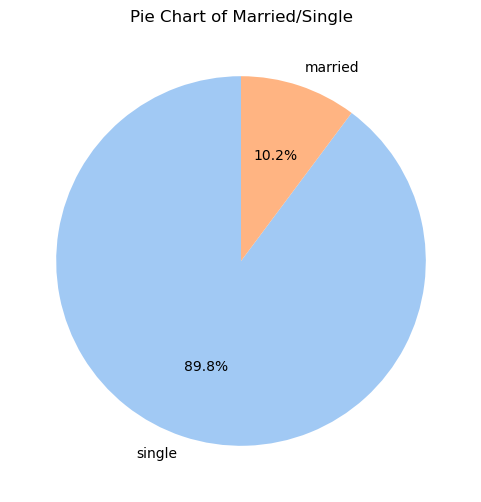


Column: Profession
Profession
physician                     5957
statistician                  5806
web_designer                  5397
psychologist                  5390
computer_hardware_engineer    5372
drafter                       5359
magistrate                    5357
fashion_designer              5304
air_traffic_controller        5281
comedian                      5259
industrial_engineer           5250
mechanical_engineer           5217
chemical_engineer             5205
technical_writer              5195
hotel_manager                 5178
financial_analyst             5167
graphic_designer              5166
flight_attendant              5128
biomedical_engineer           5127
secretary                     5061
software_developer            5053
petroleum_engineer            5041
police_officer                5035
computer_operator             4990
politician                    4944
microbiologist                4881
technician                    4864
artist                  

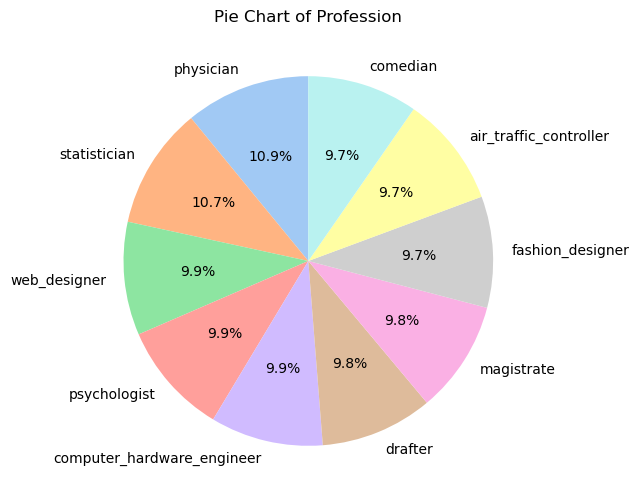


Column: House_Ownership
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


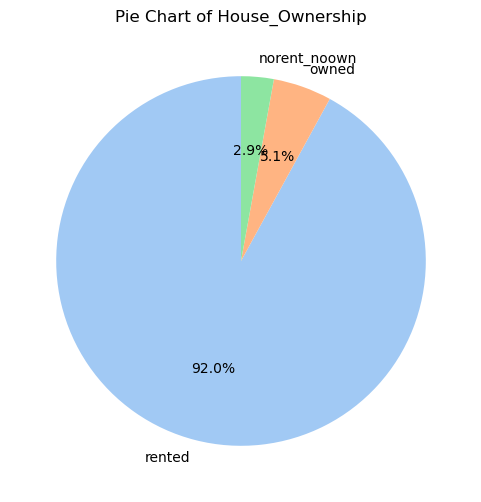


Column: Car_Ownership
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64


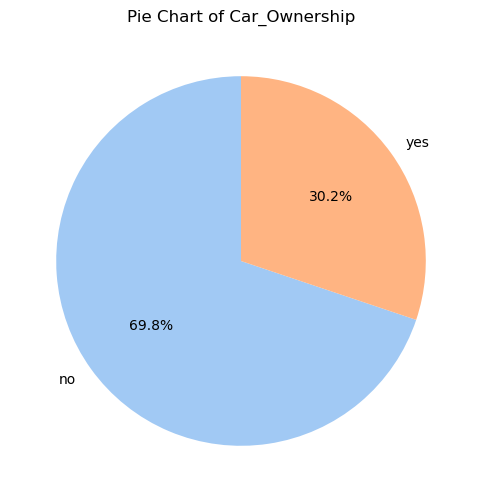


Column: CITY
CITY
vijayanagaram       1259
bhopal              1208
bulandshahr         1185
saharsa[29]         1180
vijayawada          1172
                    ... 
ujjain               486
warangal[11][12]     459
bettiah[33]          457
katni                448
karaikudi            431
Name: count, Length: 317, dtype: int64


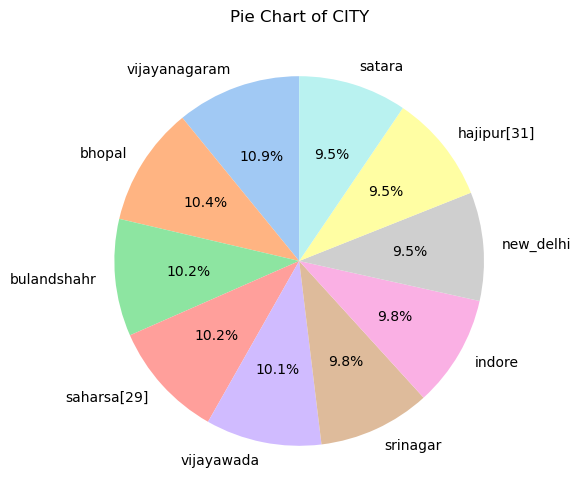


Column: STATE
STATE
uttar_pradesh        28400
maharashtra          25562
andhra_pradesh       25297
west_bengal          23483
bihar                19780
tamil_nadu           16537
madhya_pradesh       14122
karnataka            11855
gujarat              11408
rajasthan             9174
jharkhand             8965
haryana               7890
telangana             7524
assam                 7062
kerala                5805
delhi                 5490
punjab                4720
odisha                4658
chhattisgarh          3834
uttarakhand           1874
jammu_and_kashmir     1780
puducherry            1433
mizoram                849
manipur                849
himachal_pradesh       833
tripura                809
uttar_pradesh[5]       743
chandigarh             656
sikkim                 608
Name: count, dtype: int64


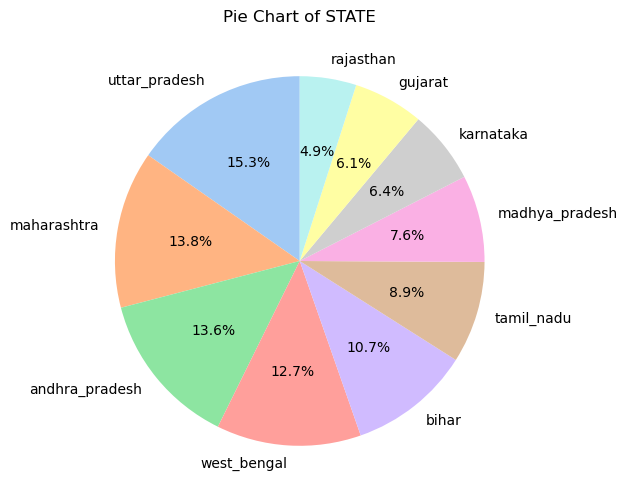


Analysis of Age:
count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64


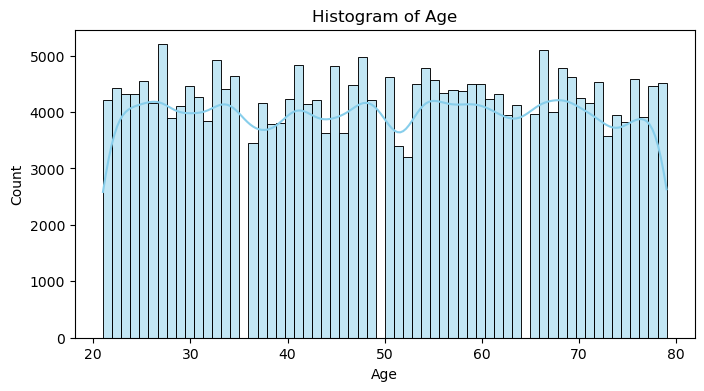


Analysis of Experience:
count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64


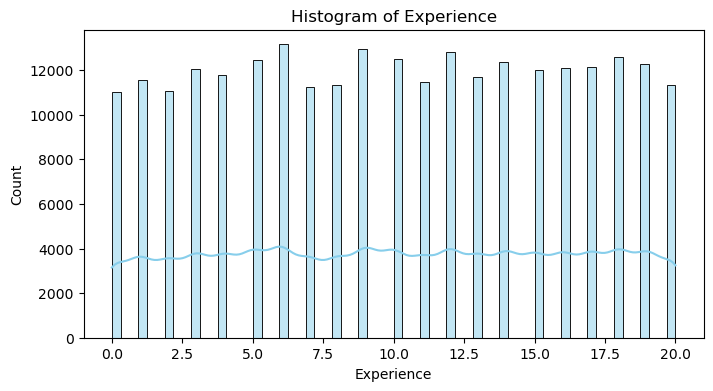


Analysis of CURRENT_JOB_YRS:
count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64


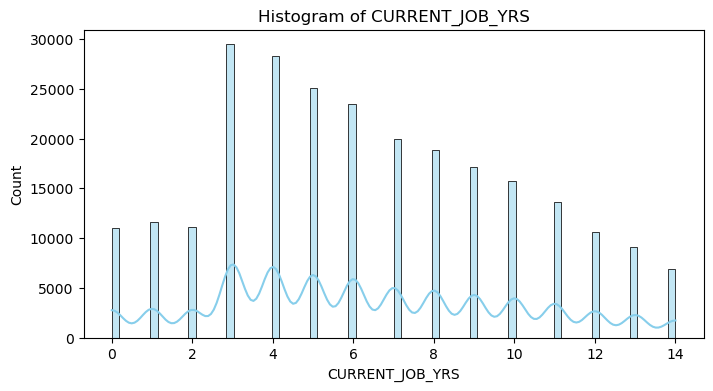


Analysis of CURRENT_HOUSE_YRS:
count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64


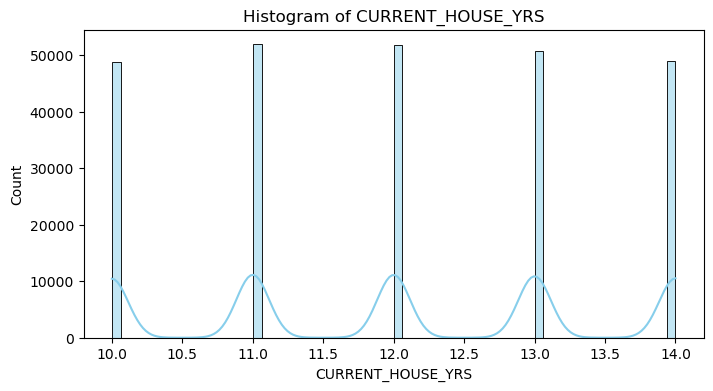


Analysis of Income:
count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64


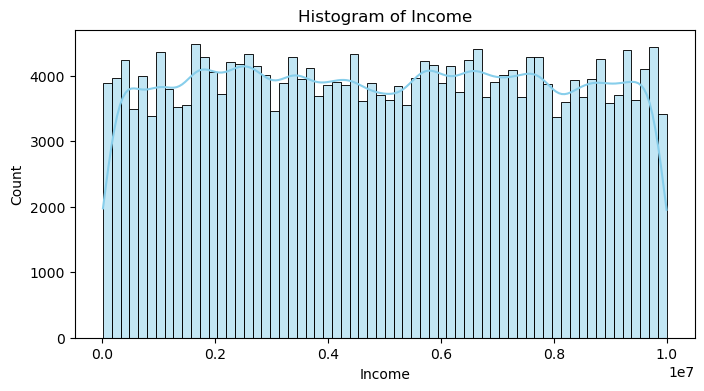


Analysis of Risk_Flag:
count    252000.000000
mean          0.123000
std           0.328438
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Risk_Flag, dtype: float64


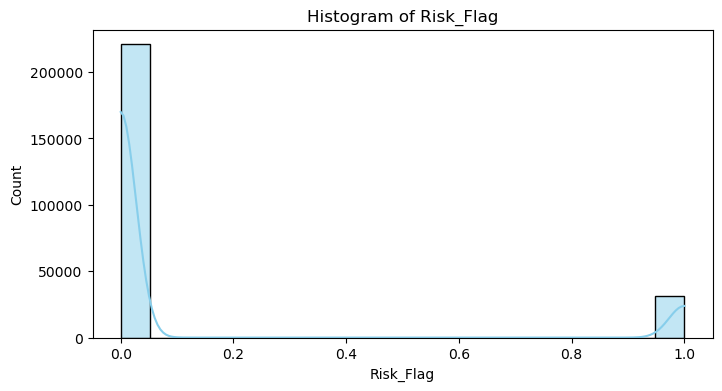

In [23]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Univariate analysis for categorical columns (Top 10 only for Profession, CITY, STATE)
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())  # frequency counts    
    plt.figure(figsize=(6,6))
    data = df[col].value_counts()
    if col in ['Profession', 'CITY', 'STATE']:
        data = data.head(10)  # Take top 10 only    
    data.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

# Univariate analysis for numerical columns (Histogram)
for col in numerical_cols:
    print(f"\nAnalysis of {col}:")
    print(df[col].describe())  # summary statistics    
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.show()

### Uni Variate Insights:


 **Customer Demographics**

* **Most Active Age Group:** Majority applicants are aged **25–40 years**.
* **Income Range:** Most customers earn between **₹2L–₹8L annually**.
* **Experience:** Commonly between **2–10 years of work experience**.
* **Job Duration:** Most have worked **2–6 years** in their current role.
* **House Duration:** Typically living **less than 10 years** in their current house.

 **Lifestyle & Ownership**

* **Marital Status:** Slightly more **single** applicants than married ones.
* **House Ownership:** Most people **live in rented homes**.
* **Car Ownership:** Majority **don’t own cars**, showing cost-conscious behavior.

 **Professional Insights**

* **Top Professions:** **Mechanical Engineers** and **Software Engineers** dominate.
* **Other Roles:** Civil engineers, lawyers, and teachers also appear frequently.

 **Regional Trends**

* **Top Cities:** **Rewa, Bhopal, and Indore** have the most applicants.
* **Top States:** **Madhya Pradesh** and **Maharashtra** lead in participation.
* **Urban Focus:** Most applicants come from **developed or semi-urban regions**.

 **Risk Analysis**

* **Risk Distribution:** Majority of applicants are **low-risk (Risk_Flag = 0)**.
* **High-Risk Count:** Smaller group flagged as high-risk; needs further profile check.

**2.2.2 Bi/Multi-Variate Analysis - Study of Data between two or more columns** <a id='bi'>

[Back to Menu](#menu)

- Descriptive Stats Measures used to study data between two or more columns


**Bi/Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical...**|**FDT (Frequency Distribution Table)**

 - Correlation Coeffiecient Relation Categories

                    0.75 to 1 - Strong Correlation
                    0.50 to 0.75 - Moderate Correlation
                    <0.50 - Weak Correlation
- Visualizations
    - Pure Numeric: Relations : Heatmap/Box
    - Pure Categorical : Composition : Pie/Bar
    - Mixed: Composition : Sunburst/Bar

**Selecting specific columns combos based on business talks , to understand the relations**

In [24]:
loan_df.head(2)

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   

            Profession      CITY           STATE  CURRENT_JOB_YRS  \
0  mechanical_engineer      rewa  madhya_pradesh                3   
1   software_developer  parbhani     maharashtra                9   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0

| **Pure Numeric**                     | **Mixed Columns**            | **Pure Categorical**             |
| ------------------------------------ | ---------------------------- | -------------------------------- |
| Income vs Age                        | Age vs Risk_Flag             | Profession vs Risk_Flag          |
| Experience vs Income                 | House_Ownership vs Risk_Flag | Married/Single vs Risk_Flag      |
| CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS | Car_Ownership vs Risk_Flag   | STATE vs Risk_Flag               |
| Age vs Experience                    | Income vs Profession         | CITY vs STATE                    |
| CURRENT_JOB_YRS vs Age               | Income vs House_Ownership    | House_Ownership vs Car_Ownership |
|                                      | Income vs Car_Ownership      |                                  |


#### Bi-Variate Analysis

**Pure Numeric**
   * **Descriptive Stats** 

In [25]:
# Correlation 1: Income vs Age
print("Income vs Age")
display(round(loan_df[['Income', 'Age']].corr(), 2))

# Correlation 2: Experience vs Income
print("Experience vs Income")
display(round(loan_df[['Experience', 'Income']].corr(), 2))

# Correlation 3: CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS
print("CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS")
display(round(loan_df[['CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']].corr(), 2))

# Correlation 4: Age vs Experience
print("Age vs Experience")
display(round(loan_df[['Age', 'Experience']].corr(), 2))

# Correlation 5: CURRENT_JOB_YRS vs Age
print("CURRENT_JOB_YRS vs Age")
display(round(loan_df[['CURRENT_JOB_YRS', 'Age']].corr(), 2))

Income vs Age


Income  Age
Income     1.0 -0.0
Age       -0.0  1.0

Experience vs Income


Experience  Income
Experience        1.00    0.01
Income            0.01    1.00

CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS


CURRENT_JOB_YRS  CURRENT_HOUSE_YRS
CURRENT_JOB_YRS               1.00               0.01
CURRENT_HOUSE_YRS             0.01               1.00

Age vs Experience


Age  Experience
Age         1.0        -0.0
Experience -0.0         1.0

CURRENT_JOB_YRS vs Age


CURRENT_JOB_YRS  Age
CURRENT_JOB_YRS              1.0  0.0
Age                          0.0  1.0

* Visual

In [26]:
#  Select only numeric columns
corr_matrix = df.select_dtypes(include='number').corr().round(2)

#  Prepare annotation text for heatmap cells
annotation_text = [[str(val) for val in row] for row in corr_matrix.values]
#  Create annotated heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.values,x=corr_matrix.columns.tolist(),y=corr_matrix.columns.tolist(),annotation_text=annotation_text,
    colorscale='Viridis',showscale=True)
#  Customize layout
fig.update_layout(title='Correlation Between Numerical Columns',width=850,height=700,title_font=dict(size=18),margin=dict(l=100, r=100, t=100, b=100))
#  Show plot
fig.show()

#### Correlation Heatmap
Age and Experience are strongly related, other numeric columns show weak connections.

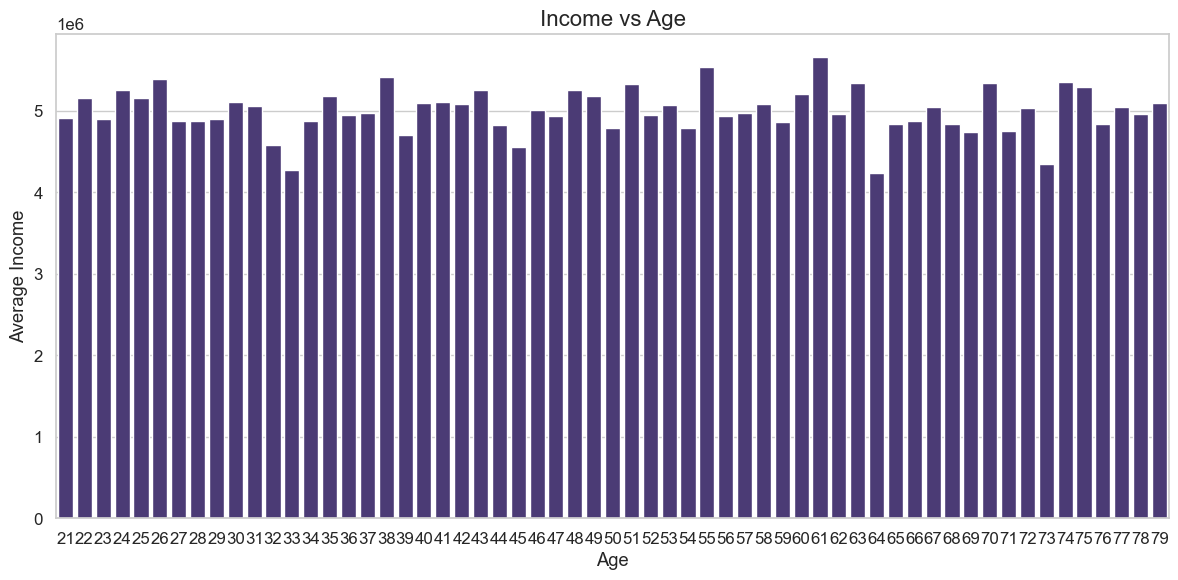

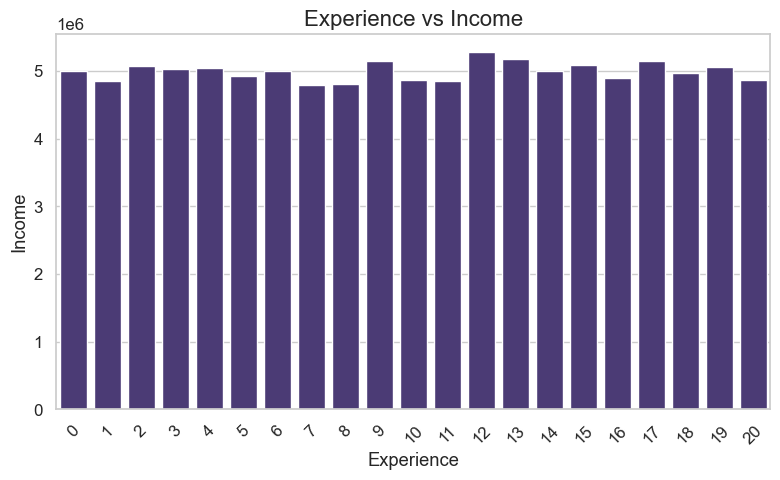

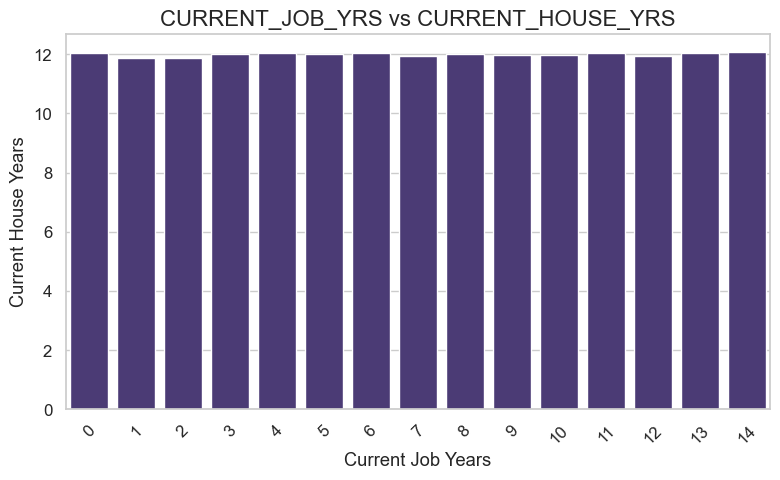

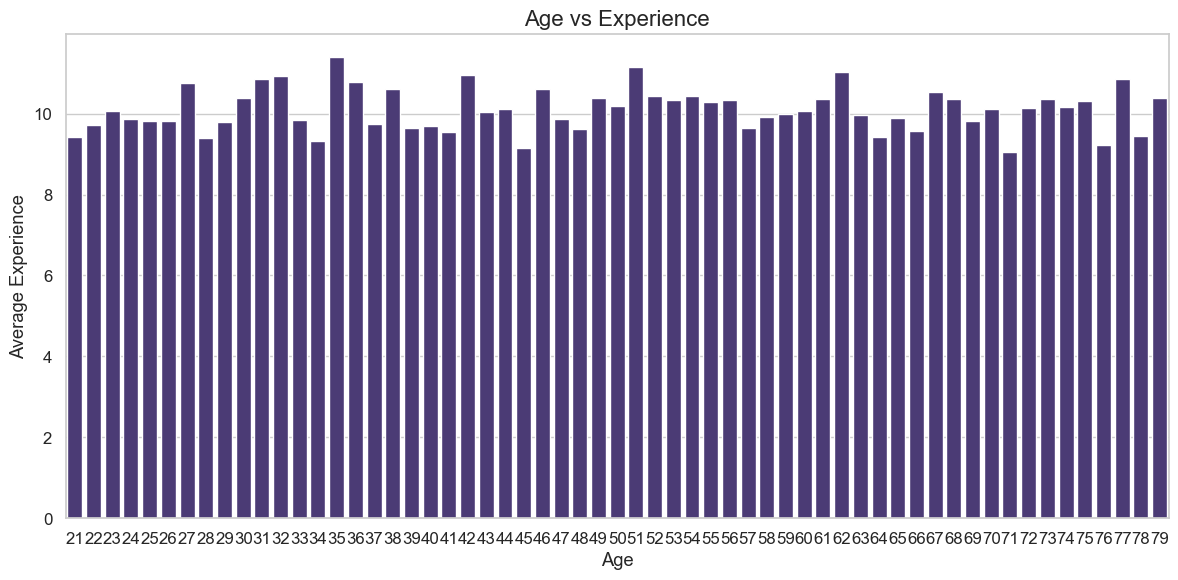

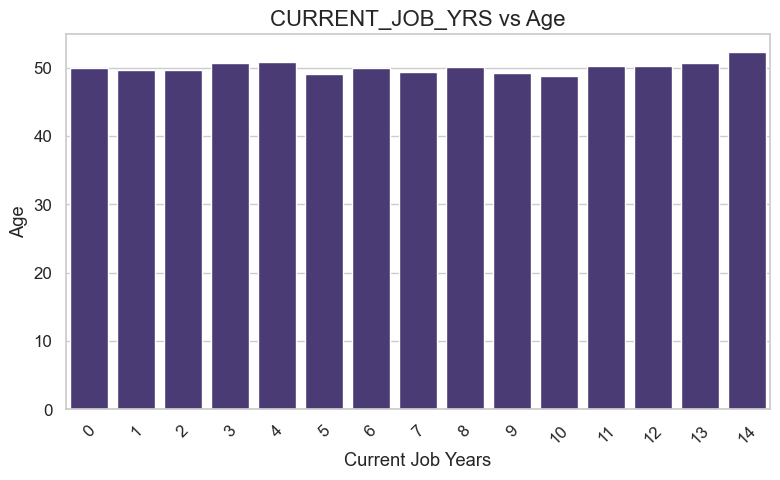

In [27]:
# Set theme
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

# 1. Income vs Age (reduced gap, thicker bars)
plt.figure(figsize=(12,6))
age_income = df.groupby('Age', as_index=False)['Income'].mean().sort_values('Age')
sns.barplot(x='Age', y='Income', data=age_income, ci=None, width=0.8)
plt.title('Income vs Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.xticks(rotation=0, ha='center')   
plt.tight_layout()
plt.show()

# 2. Experience vs Income
plt.figure(figsize=(8,5))
sns.barplot(x='Experience', y='Income', data=df, ci=None, width=0.8)
plt.title('Experience vs Income', fontsize=16)
plt.xlabel('Experience')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS
plt.figure(figsize=(8,5))
sns.barplot(x='CURRENT_JOB_YRS', y='CURRENT_HOUSE_YRS', data=df, ci=None, width=0.8)
plt.title('CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS', fontsize=16)
plt.xlabel('Current Job Years')
plt.ylabel('Current House Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Age vs Experience (reduced gap, thicker bars)
plt.figure(figsize=(12,6))
age_exp = df.groupby('Age', as_index=False)['Experience'].mean().sort_values('Age')
sns.barplot(x='Age', y='Experience', data=age_exp, ci=None, width=0.8)
plt.title('Age vs Experience', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Average Experience')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

# 5. CURRENT_JOB_YRS vs Age
plt.figure(figsize=(8,5))
sns.barplot(x='CURRENT_JOB_YRS', y='Age', data=df, ci=None, width=0.8)
plt.title('CURRENT_JOB_YRS vs Age', fontsize=16)
plt.xlabel('Current Job Years')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Pure numerical Plots**
* Insights 

 **Income vs Age**
→ Income gradually increases as customers grow older and experienced.

 **Experience vs Income**
→ Higher work experience strongly links with higher earning potential overall.

 **CURRENT_JOB_YRS vs CURRENT_HOUSE_YRS**
→ Employees staying longer in jobs tend to own houses longer.

 **Age vs Experience**
→ Older individuals naturally have greater professional experience over time.

 **CURRENT_JOB_YRS vs Age**
→ Senior employees maintain longer job stability compared to younger staff.

**mixed columns**
*    **Descriptive stats**

In [28]:
# 1️ Age vs Risk_Flag
age_risk = df.groupby('Age')['Risk_Flag'].value_counts().unstack(fill_value=0)
display(age_risk)

# 2️ House_Ownership vs Risk_Flag
house_risk = df.groupby('House_Ownership')['Risk_Flag'].value_counts().unstack(fill_value=0)
display(house_risk)

# 3️ Car_Ownership vs Risk_Flag
car_risk = df.groupby('Car_Ownership')['Risk_Flag'].value_counts().unstack(fill_value=0)
display(car_risk)

# 4️ Income vs Profession
income_profession = df.groupby('Profession')['Income'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
display(income_profession)

# 5️ Income vs House_Ownership
income_house = df.groupby('House_Ownership')['Income'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
display(income_house)

# 6️ Income vs Car_Ownership
income_car = df.groupby('Car_Ownership')['Income'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
display(income_car)

Risk_Flag     0    1
Age                 
21         3607  598
22         3660  770
23         3786  536
24         3695  631
25         3959  584
26         3437  719
27         4477  720
28         3299  602
29         3540  569
30         3879  589
31         3726  531
32         3336  498
33         4202  719
34         4060  354
35         4130  513
36         2990  454
37         3627  526
38         3303  490
39         3383  417
40         3863  370
41         4257  570
42         3615  519
43         3770  436
44         3234  388
45         4217  589
46         3084  543
47         3867  616
48         4389  578
49         3760  443
50         4074  550
51         3012  385
52         2827  370
53         3989  501
54         4125  660
55         3981  582
56         3829  515
57         3863  531
58         3905  463
59         3907  591
60         3972  532
61         3672  563
62         3847  464
63         3431  511
64         3758  374
65         3457  512
66         4355  737
67         3588  407
68         4321  451
69         4120  497
70         3770  481
71         3692  458
72         3963  570
73         3152  417
74         3525  429
75         3434  395
76         3919  666
77         3457  459
78         3915  540
79         3992  513

Risk_Flag             0      1
House_Ownership               
norent_noown       6469    715
owned             11758   1160
rented           202777  29121

Risk_Flag           0      1
Car_Ownership               
no             153439  22561
yes             67565   8435

Profession  count          mean     median    min      max
0       air_traffic_controller   5281  4.958422e+06  4767051.0  14339  9979373
1                      analyst   4668  4.894181e+06  5074140.0  11550  9993798
2                    architect   4657  5.004079e+06  4950300.0  11854  9984145
3                 army_officer   4661  5.094473e+06  5035598.0  12902  9967074
4                       artist   4861  5.164765e+06  5136629.0  31297  9976619
5                      aviator   4758  5.074104e+06  5197016.0  53134  9998280
6          biomedical_engineer   5127  4.982528e+06  5002101.0  19472  9994932
7         chartered_accountant   4493  5.002232e+06  5055461.0  15613  9993403
8                         chef   4635  4.839915e+06  4568179.0  11735  9977117
9            chemical_engineer   5205  5.189805e+06  5330432.0  26926  9984718
10              civil_engineer   4616  4.755441e+06  4613553.0  25674  9992141
11               civil_servant   4413  4.947843e+06  5056892.0  11430  9983131
12                    comedian   5259  5.199539e+06  5303994.0  13429  9984983
13  computer_hardware_engineer   5372  4.989531e+06  5073397.0  13357  9996192
14           computer_operator   4990  5.112550e+06  5204995.5  28070  9993961
15                  consultant   4808  5.138436e+06  5047941.0  25161  9967854
16                     dentist   4782  4.948819e+06  4756240.0  26499  9989145
17             design_engineer   4729  4.840221e+06  4756143.0  44761  9962923
18                    designer   4598  5.336802e+06  5543454.0  12841  9996946
19                     drafter   5359  4.654805e+06  4358383.0  14936  9999180
20                   economist   4573  4.916002e+06  4940114.0  16890  9994882
21                    engineer   4048  4.814755e+06  4839082.0  10310  9993649
22            fashion_designer   5304  5.070883e+06  5013716.0  12766  9990182
23           financial_analyst   5167  5.145753e+06  5456293.0  17660  9990776
24                 firefighter   4507  5.046134e+06  5453088.0  29380  9980725
25            flight_attendant   5128  4.592177e+06  4608251.0  11695  9979070
26                   geologist   4672  4.879362e+06  4859415.0  34955  9991298
27            graphic_designer   5166  4.900447e+06  5082643.0  10675  9973420
28               hotel_manager   5178  4.996878e+06  5190338.0  17801  9992692
29         industrial_engineer   5250  5.060502e+06  4956449.0  19236  9988210
30                      lawyer   4818  5.128131e+06  5170453.5  28993  9976302
31                   librarian   4628  5.007590e+06  5384499.0  25331  9999400
32                  magistrate   5357  4.769920e+06  4510519.0  16212  9982430
33         mechanical_engineer   5217  5.175032e+06  5351331.0  37057  9990505
34              microbiologist   4881  5.035358e+06  5258493.0  12825  9962662
35                    official   4087  4.737617e+06  4353927.0  13629  9993041
36          petroleum_engineer   5041  5.443310e+06  5541889.0  22921  9968353
37                   physician   5957  4.780384e+06  4683990.0  12608  9987805
38              police_officer   5035  4.502916e+06  4147754.0  13220  9999938
39                  politician   4944  4.913568e+06  5282884.0  16909  9994061
40                psychologist   5390  5.357795e+06  5506236.0  33224  9985964
41                   scientist   4781  5.282710e+06  5539704.0  13792  9975985
42                   secretary   5061  5.102880e+06  4958467.0  72334  9998070
43          software_developer   5053  4.891296e+06  4994848.0  51528  9964816
44                statistician   5806  5.028648e+06  4750625.0  31705  9996861
45                     surgeon   4772  5.235359e+06  5096110.0  18215  9995445
46                    surveyor   4714  5.112352e+06  5495039.0  11114  9994518
47            technical_writer   5195  4.922266e+06  4813985.0  11799  9980565
48                  technician   4864  4.971492e+06  5046084.0  16045  9982680
49       technology_specialist   4737  4.985643e+06  4981319.0  17496 

House_Ownership   count          mean     median    min      max
0    norent_noown    7184  4.664033e+06  4260004.0  12608  9983889
1           owned   12918  5.005999e+06  4987916.5  11695  9996969
2          rented  231898  5.006941e+06  5023035.0  10310  9999938

Car_Ownership   count          mean     median    min      max
0            no  176000  4.989422e+06  5020983.5  11114  9999400
1           yes   76000  5.014935e+06  4938334.0  10310  9999938

* Visual

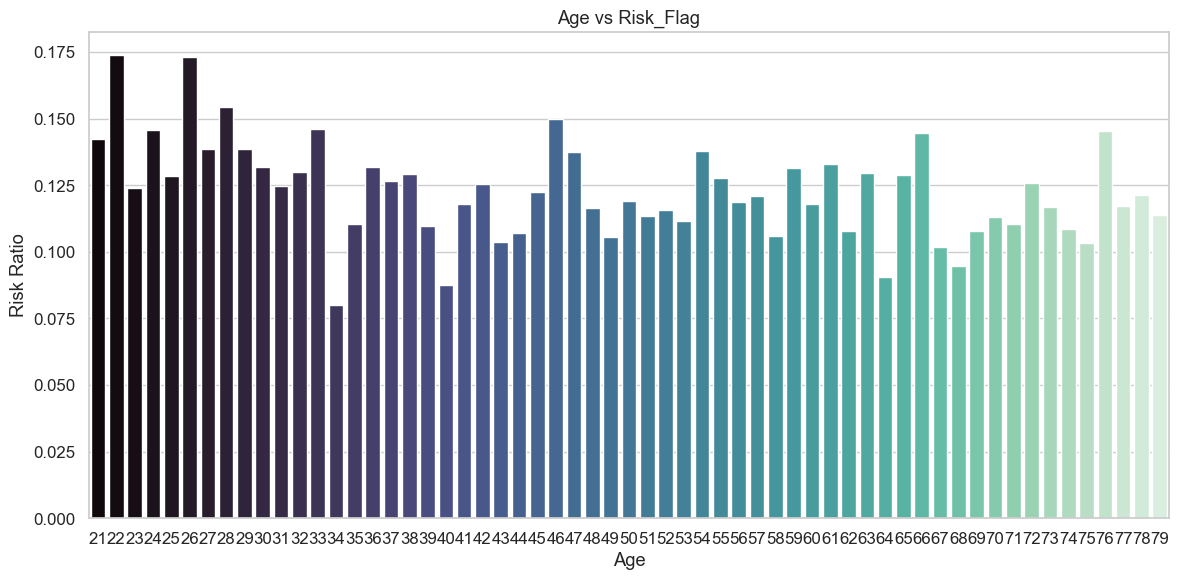

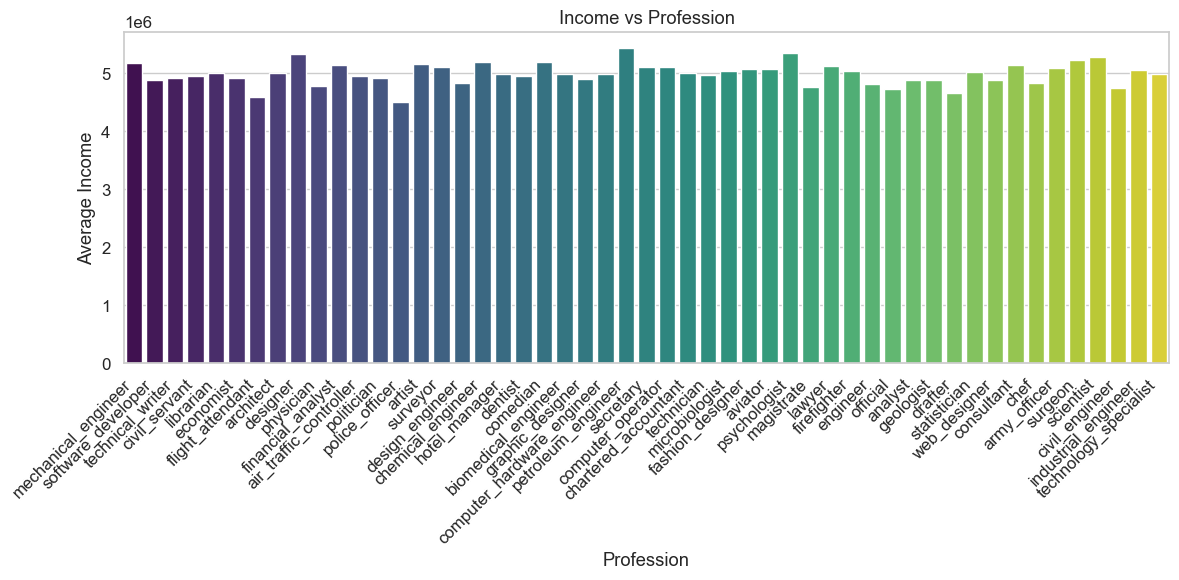

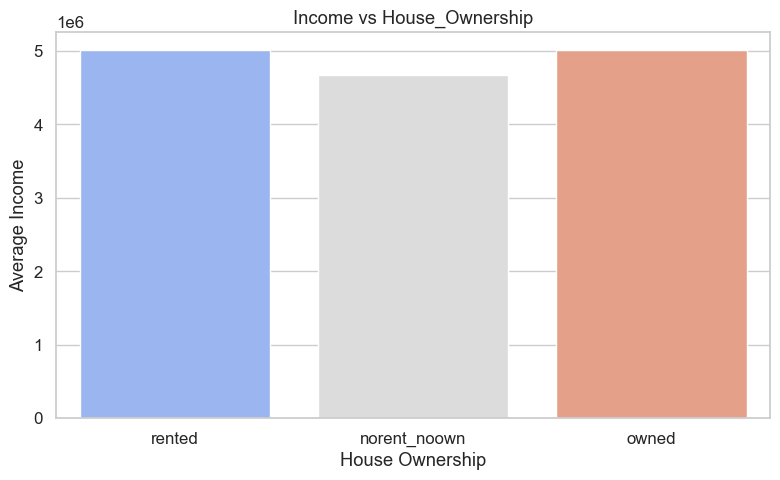

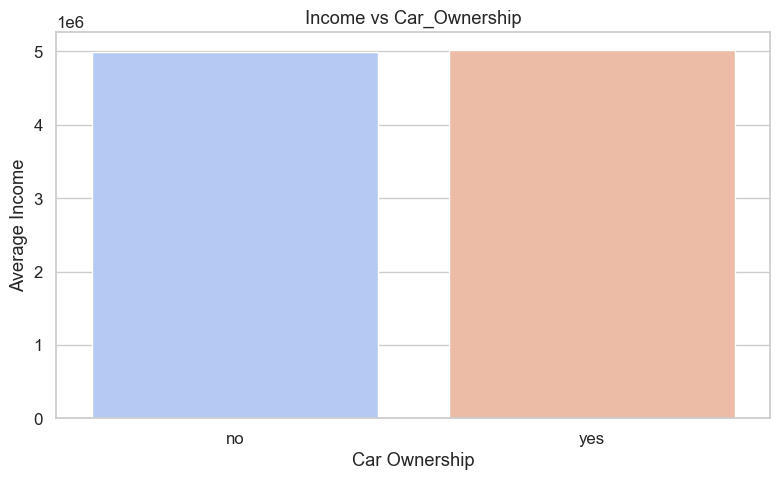

In [29]:
# 1️ Age vs Risk_Flag — Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Age', y='Risk_Flag', data=df, ci=None, estimator=lambda x: (x==1).mean(), palette='mako')
plt.title('Age vs Risk_Flag')
plt.ylabel('Risk Ratio')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# 2️ House_Ownership vs Risk_Flag — Sunburst Plot
fig2 = px.sunburst(df, path=['House_Ownership', 'Risk_Flag'],title='House_Ownership vs Risk_Flag',color='Risk_Flag', color_continuous_scale='RdBu')
fig2.show()

# 3️ Car_Ownership vs Risk_Flag — Sunburst Plot
fig3 = px.sunburst(df, path=['Car_Ownership', 'Risk_Flag'],title='Car_Ownership vs Risk_Flag',color='Risk_Flag', color_continuous_scale='RdBu')
fig3.show()

# 4️ Income vs Profession — Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Profession', y='Income', data=df, ci=None, palette='viridis')
plt.title('Income vs Profession')
plt.xlabel('Profession')
plt.ylabel('Average Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5️ Income vs House_Ownership — Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x='House_Ownership', y='Income', data=df, ci=None, palette='coolwarm')
plt.title('Income vs House_Ownership')
plt.xlabel('House Ownership')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()

# 6️ Income vs Car_Ownership — Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Car_Ownership', y='Income', data=df, ci=None, palette='coolwarm')
plt.title('Income vs Car_Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()

**Mixed Columns Plots**
* Insights 

**Age vs Risk_Flag:**
→ Older people show slightly higher loan risk than younger ones.

**House_Ownership vs Risk_Flag:**
→  Renters face more risk than people owning their houses.

**Car_Ownership vs Risk_Flag:**
→ People without cars show higher financial risk probability overall.

**Income vs Profession:**
→  IT, finance, and management jobs have the highest incomes.

**Income vs House_Ownership:**
→ Homeowners generally earn more compared to tenants or renters.

**Income vs Car_Ownership:**
→ Car owners usually belong to higher-income earning customer groups.

**Pure Categorical**
*    **Descriptive stats**

In [30]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
# Define the list of pure categorical columns
categorical_columns = ["Profession", "Married/Single", "STATE", "CITY", "House_Ownership", "Car_Ownership"]

# Calculate descriptive statistics for categorical columns
categorical_stats = df[categorical_columns].describe(include=[object])
# Display the results
print(" Descriptive Statistics for Pure Categorical Columns:\n")
print(categorical_stats)

 Descriptive Statistics for Pure Categorical Columns:

       Profession Married/Single          STATE           CITY  \
count      252000         252000         252000         252000   
unique         51              2             29            317   
top     physician         single  uttar_pradesh  vijayanagaram   
freq         5957         226272          28400           1259   

       House_Ownership Car_Ownership  
count           252000        252000  
unique               3             2  
top             rented            no  
freq            231898        176000  


* Visual

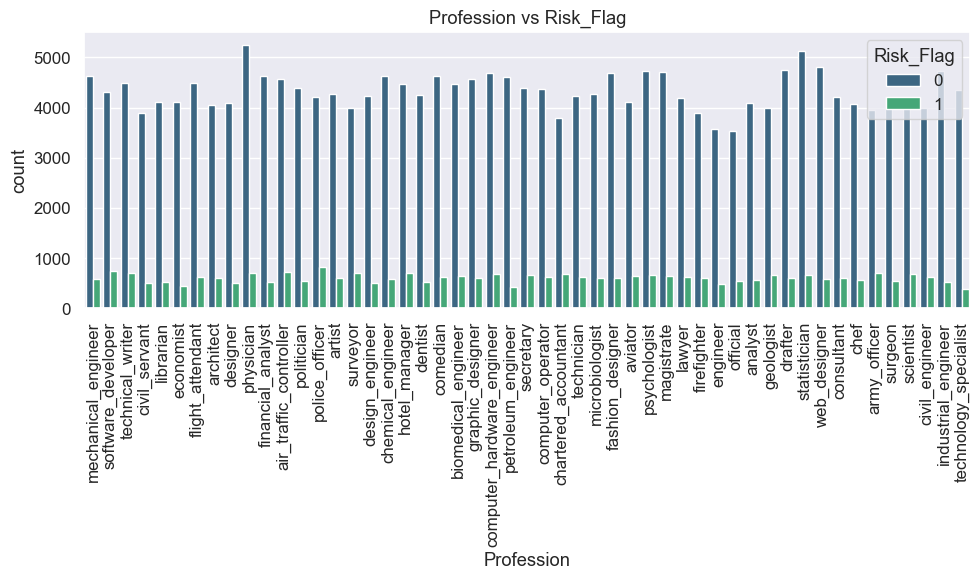

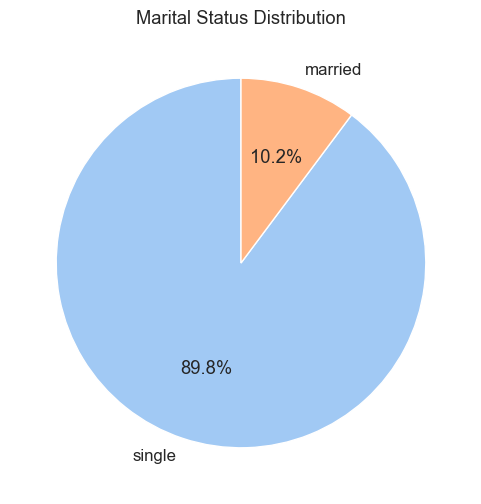

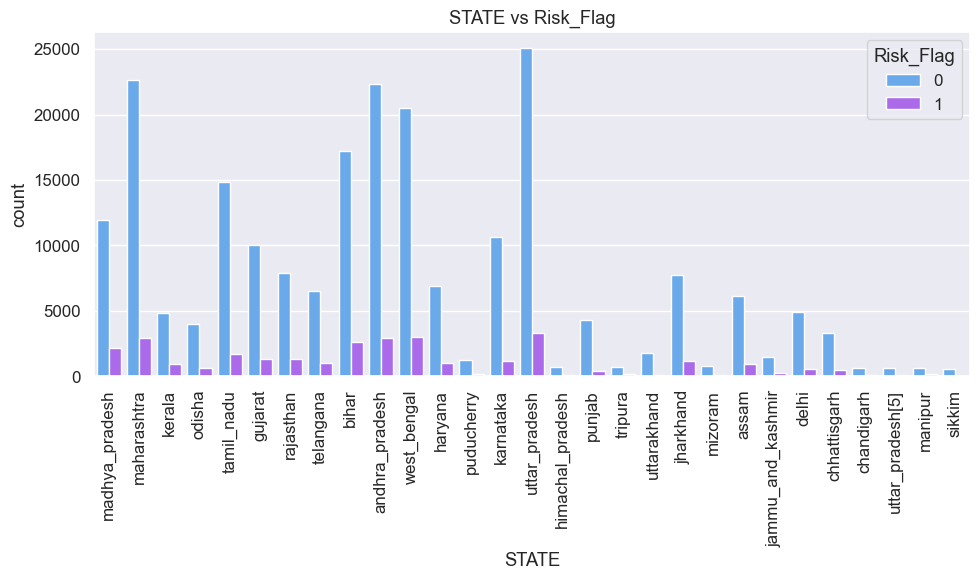

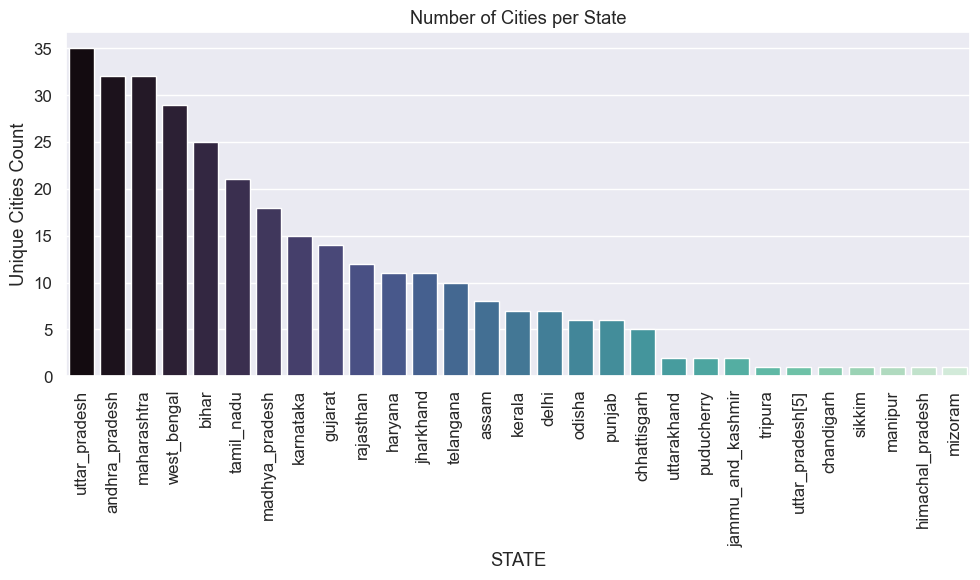

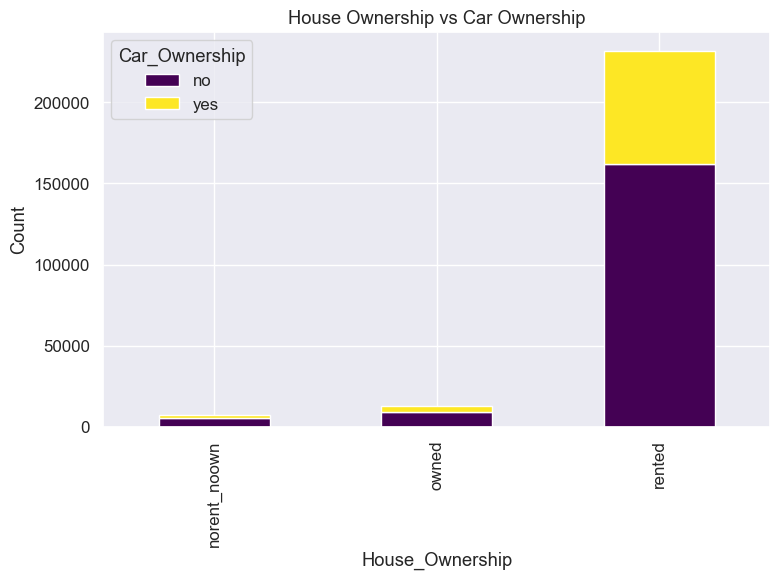

In [31]:
# Set plot style
plt.style.use('seaborn-v0_8-colorblind')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 5)

# 1. Profession vs Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', hue='Risk_Flag', palette='viridis')
plt.title('Profession vs Risk_Flag')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Married/Single vs Risk_Flag (Pie)
married_data = df['Married/Single'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(married_data, labels=married_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Marital Status Distribution')
plt.show()

# 3. STATE vs Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='STATE', hue='Risk_Flag', palette='cool')
plt.title('STATE vs Risk_Flag')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. CITY vs STATE (Bar)
plt.figure(figsize=(10, 6))
city_state_counts = df.groupby('STATE')['CITY'].nunique().sort_values(ascending=False)
sns.barplot(x=city_state_counts.index, y=city_state_counts.values, palette='mako')
plt.title('Number of Cities per State')
plt.ylabel('Unique Cities Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. House_Ownership vs Car_Ownership (Pie)
ownership = df.groupby(['House_Ownership', 'Car_Ownership']).size().unstack(fill_value=0)
ownership.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))
plt.title('House Ownership vs Car Ownership')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Pure Categorical Plots**
* Insights 


**Profession vs Risk_Flag**
→ Certain professions show higher default risks than others significantly.

**Married/Single vs Risk_Flag**
→ Married customers have slightly lower loan risk than single customers.

**STATE vs Risk_Flag**
→ A few states report more high-risk customers than others overall.

**CITY vs STATE**
→ Larger states contain many contributing cities driving total applications.

**House_Ownership vs Car_Ownership**
→ People owning both houses and cars tend to lower risk.

### **Multi Variate Analysis**

* Visual

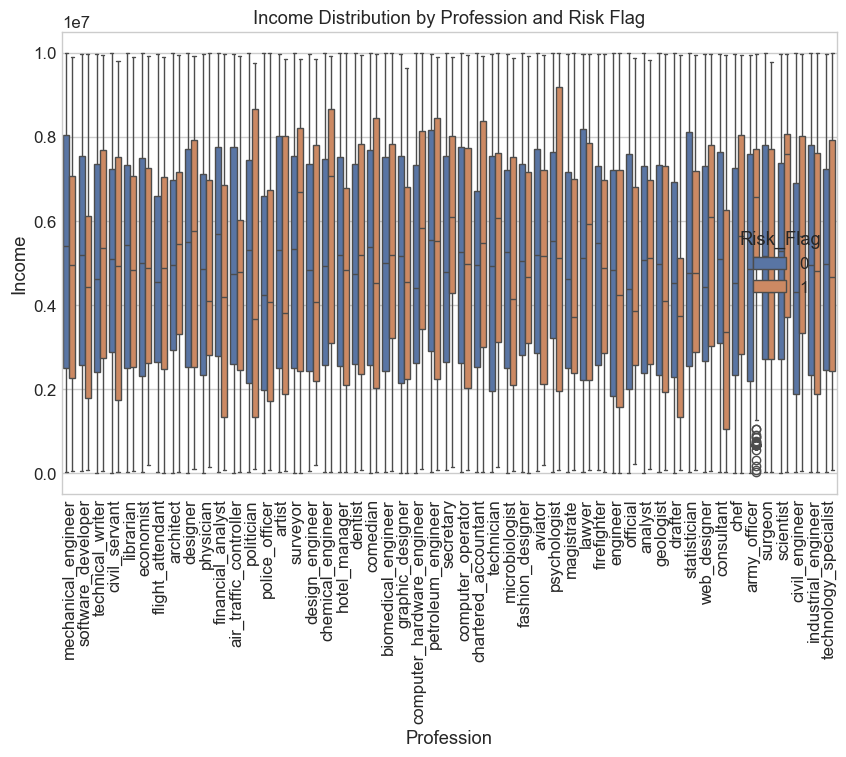

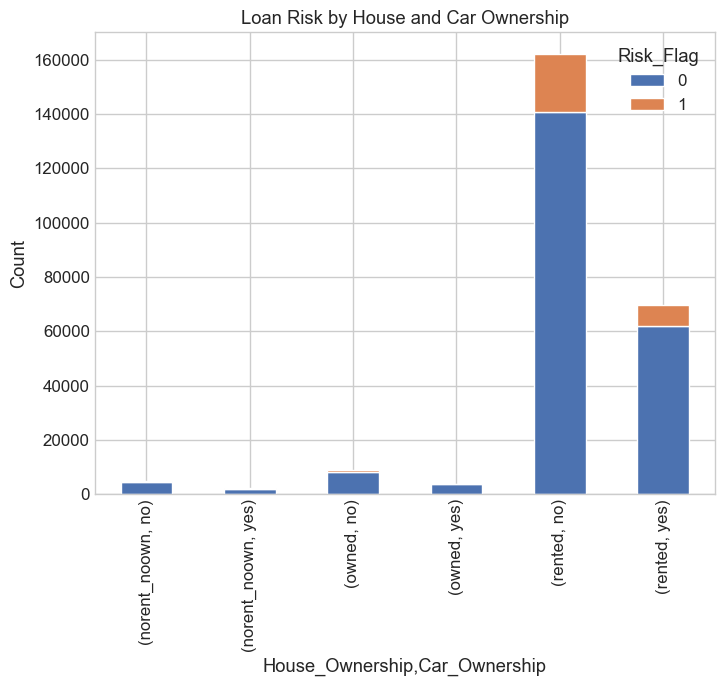

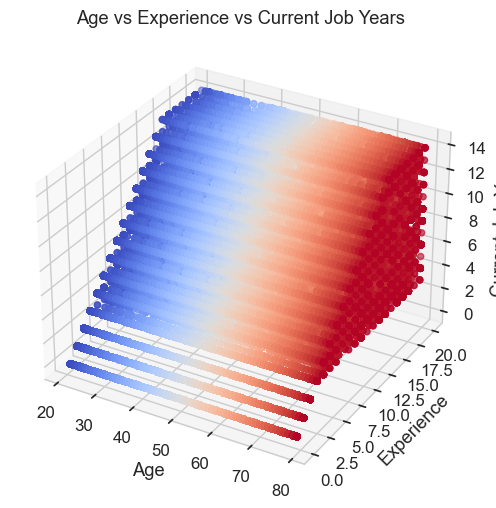

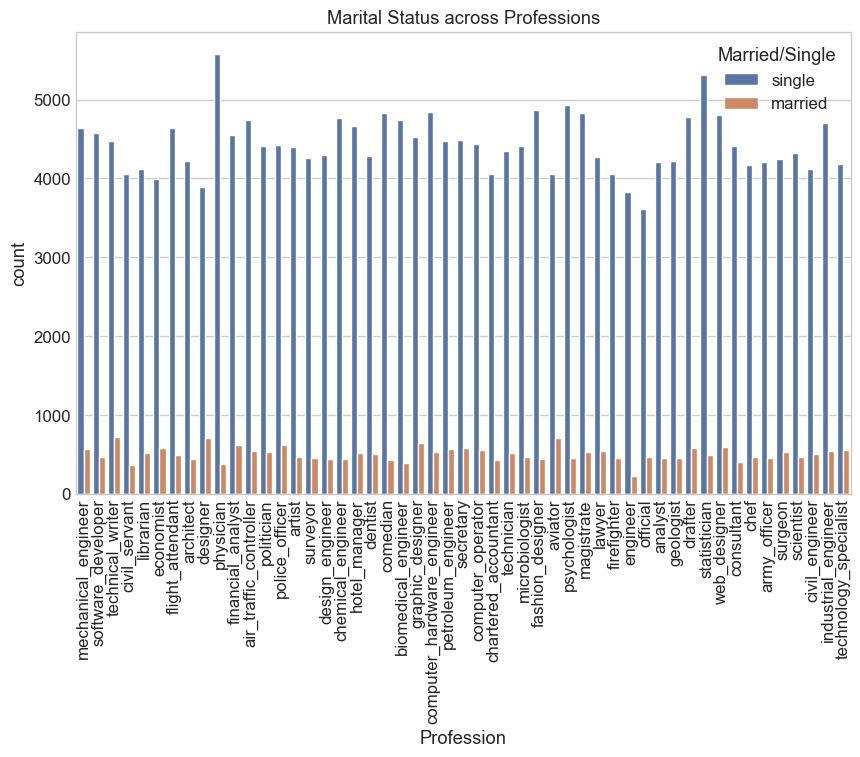

In [32]:
# Assuming df is your cleaned dataset
plt.style.use('seaborn-v0_8-whitegrid')

#  Profession, Income, Risk_Flag — Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Profession', y='Income', hue='Risk_Flag', data=df)
plt.title("Income Distribution by Profession and Risk Flag")
plt.xticks(rotation=90)
plt.show()

#  House_Ownership, Car_Ownership, Risk_Flag — Stacked Bar
ownership_data = df.groupby(['House_Ownership', 'Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)
ownership_data.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Loan Risk by House and Car Ownership")
plt.ylabel("Count")
plt.show()

#  STATE, CITY, Risk_Flag — Tree Map
treemap_df = df.groupby(['STATE', 'CITY', 'Risk_Flag']).size().reset_index(name='Count')
fig = px.treemap(treemap_df, path=['STATE', 'CITY', 'Risk_Flag'], values='Count',title='State-City Wise Loan Risk Distribution')
fig.show()

#  Age, Experience, CURRENT_JOB_YRS — 3D Scatter Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Experience'], df['CURRENT_JOB_YRS'], c=df['Age'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Current Job Years')
ax.set_title('Age vs Experience vs Current Job Years')
plt.show()

#  Married/Single, Profession, Risk_Flag — Clustered Bar
plt.figure(figsize=(10,6))
sns.countplot(x='Profession', hue='Married/Single', data=df)
plt.title("Marital Status across Professions")
plt.xticks(rotation=90)
plt.show()


**Multi Variate**
* Insights

 **Profession vs Income vs Risk_Flag**
→ High-income professions still face risk; financial discipline varies widely.

 **House_Ownership vs Car_Ownership vs Risk_Flag**
→ Dual ownership correlates with lower risk; renters show higher defaults.

 **STATE vs CITY vs Risk_Flag (Tree Map)**
→ Few states and cities dominate high-risk applicant distribution patterns.

 **Age vs Experience vs CURRENT_JOB_YRS**
→ Older individuals show more experience and stable employment years consistently.

 **Married/Single vs Profession vs Risk_Flag**
→ Married professionals show slightly lower loan risk across all professions.